In [134]:
import os
import librosa
from scipy.signal import correlate
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display, Audio 
import pandas as pd
from tqdm import tqdm
import librosa.display
import numpy as np
%%capture

UsageError: Line magic function `%%capture` not found.


In [15]:
full_audio_dir = "D:\\projects\\ProfanityFilter\\data\\wav16k\\explicit"
phrase_dir = "D:\projects\ProfanityFilter\data\explicit_phrases_vocals_16k"

In [22]:
csv_path = "D:\projects\ProfanityFilter\explicits\youtube_links_new.txt"
df = pd.read_csv(csv_path, names=["uri", "ytid", "ytid_clean", "dur_yt", "dur_yt_clean"])
df = df.drop_duplicates(subset=["ytid"])
df = df.drop_duplicates(subset=["ytid_clean"])
df = df.drop_duplicates(subset=["uri"])
df = df.dropna()

In [23]:
df

,uri,ytid,ytid_clean,dur_yt,dur_yt_clean
0,spotify:track:3JvKfv6T31zO0ini8iNItO,9i_OWaiaF34,8vN0EMCjjP0,244.0,242.0
1,spotify:track:7lQ8MOhq6IN2w8EYcFNSUk,pyb13N80DZQ,6iUeFGPWHz0,291.0,290.0
2,spotify:track:3yfqSUWxFvZELEM4PmlwIR,BdfpV-cIkuA,L0V6jKCZ370,284.0,284.0
3,spotify:track:5TXDeTFVRVY7Cvt0Dw4vWW,CD_tD26E7k0,Ro32sQudsrY,121.0,120.0
4,spotify:track:7KA4W4McWYRpgf0fWsJZWB,1_OMDlzbIuM,AhvkKR0ero8,181.0,181.0
...,...,...,...,...,...
13179,spotify:track:3Q8JrzlwciRk3j8M8UFQvr,LWycFKbNl9c,XnOrV_Bhnv0,206.0,206.0
13205,spotify:track:7FbfvVLCqraAf8iPG67cwn,AsHtIbOuBaw,AsHtIbOuBaw,177.0,177.0
13219,spotify:track:3rbuetJnPXr4ecigGVBDBo,Bw_yUjNZ4bI,dmhBewedJwg,206.0,205.0
13223,spotify:track:06K4y898EOm1CkKUwPOgNo,cVYtEUnqW_M,ungpJtM7-wg,192.0,189.0


In [41]:
final_timestamps = "D:\\projects\\ProfanityFilter\\explicits\\csvs\\new_timestamps.txt"
for d in tqdm(os.listdir(phrase_dir)):
    sdir = os.path.join(phrase_dir, d)
    for f in os.listdir(sdir):
        phrase_path = Path(os.path.join(sdir, f))
        uri, fr_id = phrase_path.name.split("_")
        name = 'spotify:track:' + uri
        yt_name = df[df.uri == name].ytid.item()
        full_path = os.path.join(full_audio_dir, f"{yt_name}.wav")
        yf, sr = librosa.load(full_path, sr=None)
        yp, sr = librosa.load(phrase_path, sr=None)
        corr = correlate(yf, yp, mode="same")
        pos = corr.argmax()
        l = pos - len(yp)//2
        r = pos+len(yp)//2
        line = f"{uri},{fr_id},{yt_name},{l},{r}\n"
        with open(final_timestamps, "a") as wf:
            wf.write(line)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [07:55<00:00, 23.77s/it]


In [68]:
csv_path = "D:\\projects\\ProfanityFilter\\explicits\\csvs\\new_timestamps.txt"
df = pd.read_csv(csv_path, names=["uri", "fr_id", "yt_id", "l", "r"])


In [67]:
df.set_index(["yt_id"]).count()

uri      835
fr_id    835
l        835
r        835
dtype: int64

In [140]:
analyse_df = pd.merge(df, df.groupby(by=["yt_id"]).agg(n_fr = ("l", "count")),left_on="yt_id", right_index=True).sort_values(by=['n_fr', 'uri', 'fr_id'], ascending=False).drop_duplicates(["uri", "fr_id"])

In [143]:
analyse_df

,uri,fr_id,yt_id,l,r,n_fr
807,7lQ8MOhq6IN2w8EYcFNSUk,6.wav,pyb13N80DZQ,3103841,3119841,8
370,7lQ8MOhq6IN2w8EYcFNSUk,4.wav,pyb13N80DZQ,2731777,2747777,8
24,7lQ8MOhq6IN2w8EYcFNSUk,3.wav,pyb13N80DZQ,2051796,2067796,8
23,7lQ8MOhq6IN2w8EYcFNSUk,2.wav,pyb13N80DZQ,1987802,2003802,8
138,7lQ8MOhq6IN2w8EYcFNSUk,1.wav,pyb13N80DZQ,1343696,1411696,8
...,...,...,...,...,...,...
439,04z8Jp9dEXMwW7SkCYYwWh,0.wav,sZRm_NPx5-Q,627873,643873,1
438,047fCsbO4NdmwCBn8pcUXl,0.wav,JDb3ZZD4bA0,2124248,2140248,1
26,02opp1cycqiFNDpLd2o1J3,0.wav,l9NtAPtd6kY,1544148,1560148,1
25,01gNiOqg8u7vT90uVgOVmz,1.wav,-i9bvwY76Pw,2159447,2179447,1


# For Demo

In [213]:
path_true = "D:\projects\ProfanityFilter\data\wav16k\explicit\wuO4_P_8p-Q.wav"

In [214]:
path_no_vocal = "D:\projects\ProfanityFilter\demo\demo_no_vocals.wav"

In [217]:
yt, sr = librosa.load(path_true, sr=16000)
ynv, sr = librosa.load(path_no_vocal, sr=16000)

In [245]:
ts = [
    (int(68*sr), int(68.75*sr)),
    (int(71*sr), int(72*sr)),    
    (int(75*sr), int(76*sr)),    
]
mask1d = np.zeros_like(yt)
for l, r in ts:
    mask1d[l:r] = 1

In [246]:
yt_mask = (1-mask1d)*yt
ynv_mask = mask1d*ynv
y = yt_mask + ynv_mask

In [248]:
display(Audio(y[2000*512:2500*512], rate=sr))

In [253]:
display(Audio(yt[2000*512:2420*512], rate=sr))

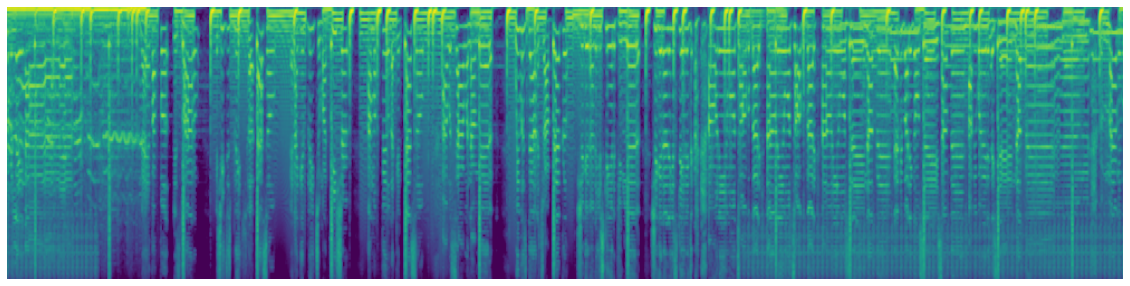

In [221]:
St = librosa.feature.melspectrogram(y=yt, sr=sr, n_mels=128,
                                    fmax=8000)
S_dBt = librosa.power_to_db(St, ref=np.max)[:, 2000:3000]
plt.figure(figsize=(20, 5))
plt.imshow(S_dBt, aspect="auto")
plt.axis("off")
plt.show()

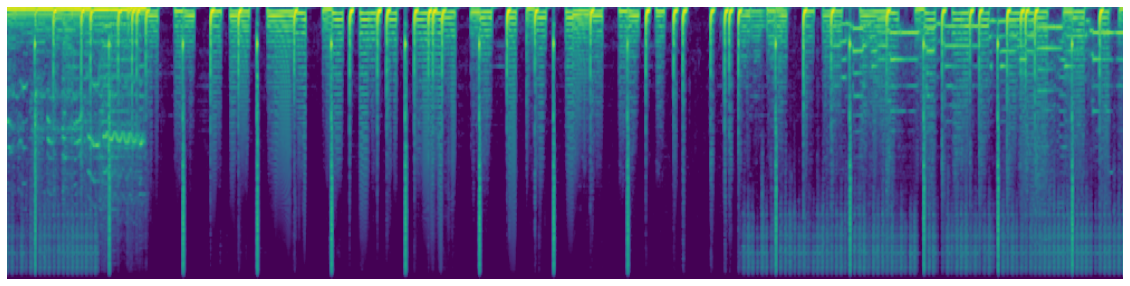

In [222]:
Snv = librosa.feature.melspectrogram(y=ynv, sr=sr, n_mels=128,
                                    fmax=8000)
S_dBnv = librosa.power_to_db(Snv, ref=np.max)[:, 2000:3000]
plt.figure(figsize=(20, 5))
plt.imshow(S_dBnv, aspect="auto")
plt.axis("off")
plt.show()

In [225]:
mask = np.zeros_like(S_dBt)
for l, r in ts:
    l = l//512 - 2000
    r = r//512 - 2000
    mask[:, l:r] = 1

In [228]:
1-mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [232]:
St = (1-mask)*S_dBt
Sv = mask*S_dBnv

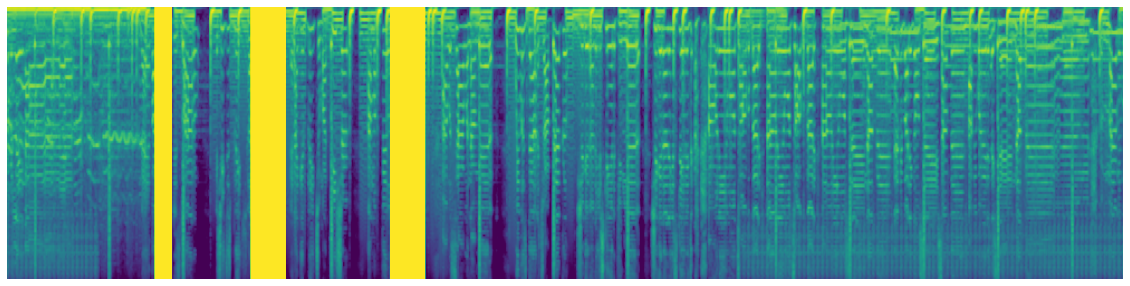

In [233]:
plt.figure(figsize=(20, 5))
plt.imshow(St, aspect="auto")
plt.axis("off")
plt.show()

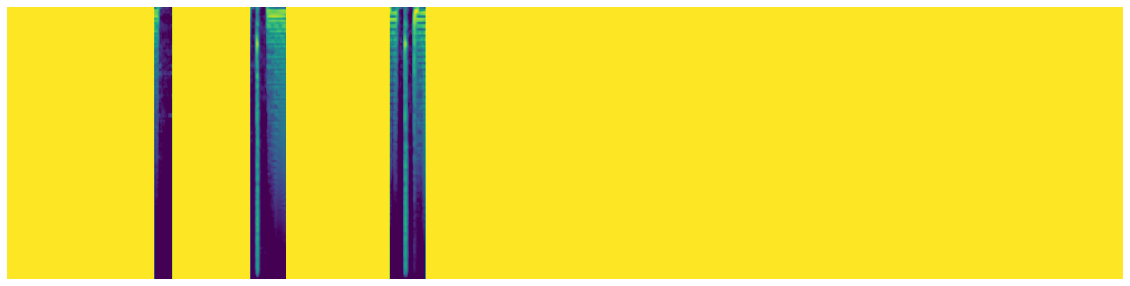

In [234]:
plt.figure(figsize=(20, 5))
plt.imshow(Sv, aspect="auto")
plt.axis("off")
plt.show()

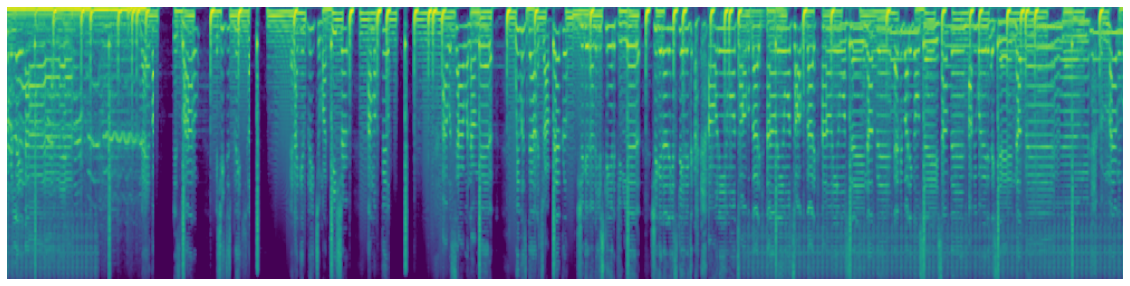

In [237]:
merged = St+Sv
plt.figure(figsize=(20, 5))
plt.imshow(merged, aspect="auto")
plt.axis("off")
plt.show()

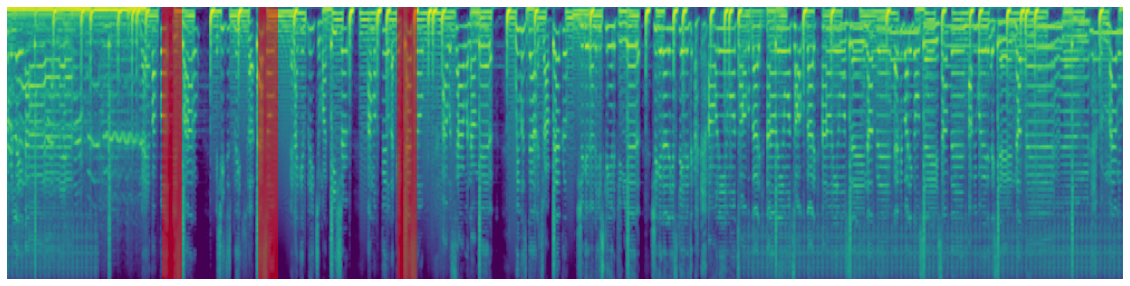

In [174]:
S_dB = librosa.power_to_db(S, ref=np.max)[:, 2000:3000]
plt.figure(figsize=(20, 5))
plt.imshow(S_dB, aspect="auto")
for l, r in ts:
    l, r = l//512, r//512
    l -= 2000
    r -= 2000
    plt.axvline(l+sr//(512*2), c="r", linewidth=20, alpha=0.5)
plt.axis("off")
plt.show()